In [15]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import cv2

**PROCESO REDUCCIÓN DE IMAGEN**

NGC 2070 se obtuvieron raws en filtro B y V, de 400s y 150s respectivamente. <br> Primero se obtendran los darks y flats para cada filtro, luego se hara la reducción de NGC para cada filtro. 

Obtenemos Master Darks, diferentes tiempos de exposición    *--> corregir ruido termino y electronico*  <br>
Obtenemos Flats, en diferentes filtros   *--> corregir ruido estructural/polvo/etc*  <br>
Reducimos el Raw, para diferentes filtros


**Master Dark 400s**

In [16]:
darks = ['C:\Yop\imagenes_astro\Darks\DARK_400s_1.fit', 'C:\Yop\imagenes_astro\Darks\DARK_400s_2.fit', 'C:\Yop\imagenes_astro\Darks\DARK_400s_3.fit', 'C:\Yop\imagenes_astro\Darks\DARK_400s_4.fit', 'C:\Yop\imagenes_astro\Darks\DARK_400s_5.fit']

lista_dark = [] #aqui guardamos los datos de los darks

for dark in darks:               # llamamos a cada dark, para conseguir su info o array, y luego dejamos la informacion..
    Dark_ = fits.getdata(dark)                  # en la lista_dark
    lista_dark.append(Dark_)
    
darks_array = np.array(lista_dark) #cada elemento de la lista a un arreglo 

master_dark400s = np.median(darks_array, 0) #Obtenemos mediana del arreglo de todos los darks
print(master_dark400s)
#guardamos el archivo fits
fits.writeto('C:\Yop\imagenes_astro\Darks\master_dark400s.fit', master_dark400s, overwrite = True)

[[105. 103. 101. ... 110. 110. 107.]
 [113. 109. 117. ... 112. 108. 114.]
 [101. 109. 110. ... 105. 108. 109.]
 ...
 [147. 163. 160. ... 122. 121. 110.]
 [147. 157. 159. ... 119. 115. 114.]
 [155. 154. 168. ... 114. 119. 116.]]


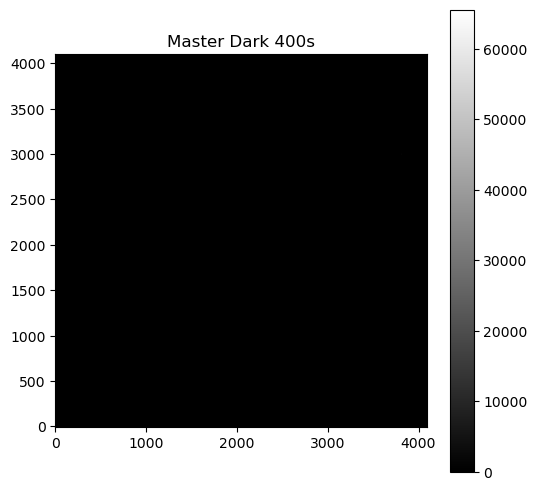

In [17]:
plt.figure(figsize=(6, 6))
plt.imshow(master_dark400s, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Master Dark 400s')
plt.show()

**Master flat filtro B**

In [18]:
FlatsB = ['C:\Yop\imagenes_astro\Flats\FLAT_B1.fit', 'C:\Yop\imagenes_astro\Flats\FLAT_B2.fit', 'C:\Yop\imagenes_astro\Flats\FLAT_B3.fit', 'C:\Yop\imagenes_astro\Flats\FLAT_B4.fit', 'C:\Yop\imagenes_astro\Flats\FLAT_B5.fit']

lista_flatsB = [] #aqui guardamos la data de los flats

for flat_B in FlatsB:                      # llamamos a cada flat, para conseguir su info(pixel value de R[x,y])...
    FlatB = fits.getdata(flat_B)                      # y luego dejamos la informacion en la lista_flats
    Flat_calibradoB = FlatB - master_dark400s
    Flat_C_normalizadoB = Flat_calibradoB/Flat_calibradoB.max() #normalizamos cada flat
    lista_flatsB.append(Flat_C_normalizadoB)

    
array_flatsB = np.array(lista_flatsB)

mediana_flats_calibrados_B = np.median(array_flatsB, 0)

max_B = mediana_flats_calibrados_B.max()

master_flatB = mediana_flats_calibrados_B/max_B

print(master_flatB)

#mascara por si en la resta dio valores 0 
master_flatB[master_flatB == 0] = 0.0001

fits.writeto('C:\Yop\imagenes_astro\Flats\master_flatB.fit', master_flatB, overwrite = True)

[[0.09316074 0.09197838 0.09443523 ... 0.13475831 0.13294638 0.13268534]
 [0.09669246 0.09644678 0.09601683 ... 0.13564892 0.13784473 0.13592531]
 [0.09504944 0.09706099 0.09552546 ... 0.13606351 0.13601744 0.13873534]
 ...
 [0.12568331 0.1269578  0.12396352 ... 0.1686475  0.16958418 0.16823291]
 [0.12720349 0.12764879 0.12761808 ... 0.16840182 0.17150359 0.17059763]
 [0.12525336 0.12892328 0.1284012  ... 0.17151895 0.16840182 0.16966095]]


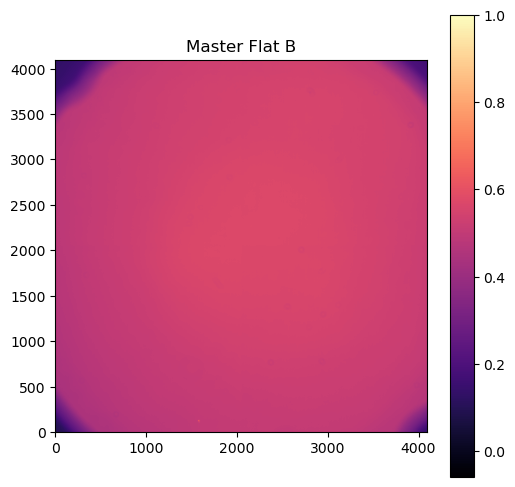

In [19]:
plt.figure(figsize=(6, 6))
plt.imshow(master_flatB, cmap='magma', origin='lower')
plt.colorbar()
plt.title('Master Flat B')
plt.show()

**Master Dark 150S**

In [20]:
darks = ['C:\Yop\imagenes_astro\Darks\DARK_150s_1.fit', 'C:\Yop\imagenes_astro\Darks\DARK_150s_2.fit', 'C:\Yop\imagenes_astro\Darks\DARK_150s_3.fit', 'C:\Yop\imagenes_astro\Darks\DARK_150s_4.fit', 'C:\Yop\imagenes_astro\Darks\DARK_150s_5.fit']

lista_dark = [] #aqui guardamos los datos de los darks

for dark in darks:               # llamamos a cada dark, para conseguir su info o array, y luego dejamos la informacion..
    Dark_ = fits.getdata(dark)                  # en la lista_dark
    lista_dark.append(Dark_)
    
darks_array = np.array(lista_dark) #cada elemento de la lista a un arreglo 

master_dark150s = np.median(darks_array, 0) #Obtenemos mediana del arreglo de todos los darks
#creamos mascara por si las moskitas 
master_dark150s[master_dark150s == 0] = 0.00001

print(master_dark150s)
#guardamos el archivo fits
fits.writeto('C:\Yop\imagenes_astro\Darks\master_dark150s.fit', master_dark150s, overwrite = True)

[[105. 105. 107. ... 112. 110. 114.]
 [118. 105. 114. ... 112. 126. 108.]
 [108. 110. 113. ... 118. 105. 119.]
 ...
 [114. 121. 127. ... 115. 121. 110.]
 [114. 121. 118. ... 117. 110. 111.]
 [126. 118. 138. ... 116. 113. 107.]]


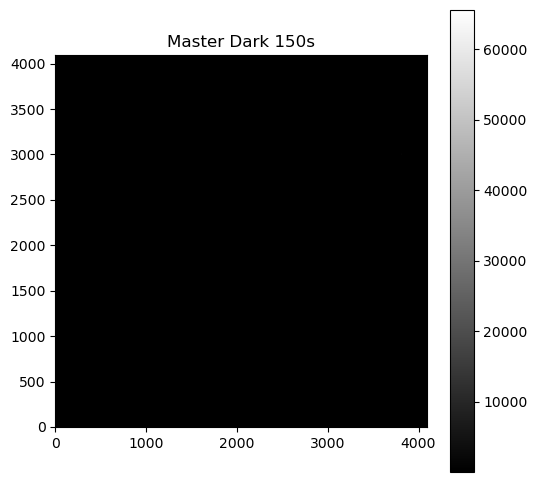

In [21]:
plt.figure(figsize=(6, 6))
plt.imshow(master_dark150s, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Master Dark 150s')
plt.show()

In [22]:
Flats = ['C:\Yop\imagenes_astro\Flats\FLAT_V1.fit', 'C:\Yop\imagenes_astro\Flats\FLAT_V2.fit', 'C:\Yop\imagenes_astro\Flats\FLAT_V3.fit', 'C:\Yop\imagenes_astro\Flats\FLAT_V4.fit', 'C:\Yop\imagenes_astro\Flats\FLAT_V5.fit']


lista_flats = [] #aqui guardamos la data de los flats

for flat_ in Flats:                      # llamamos a cada flat, para conseguir su info(pixel value de R[x,y])...
    Flat = fits.getdata(flat_)                      # y luego dejamos la informacion en la lista_flats
    Flat_calibrado = Flat - master_dark150s
    Flats_C_normalizados = Flat_calibrado/Flat_calibrado.max()
    lista_flats.append(Flats_C_normalizados)
    
array_flats = np.array(lista_flats)
mediana_flats_calibrados = np.median(array_flats, 0)
max_ = mediana_flats_calibrados.max()

master_flatV = mediana_flats_calibrados/max_
#mascara por si en la resta dio valores 0 
master_flatV[master_flatV == 0] = 0.0001

fits.writeto('C:\Yop\imagenes_astro\Flats\master_FlatV.fit', master_flatV, overwrite = True)

In [23]:
master_flatV

array([[0.04619094, 0.04597595, 0.04574561, ..., 0.0556349 , 0.05658697,
        0.05652554],
       [0.04695874, 0.04728121, 0.04838685, ..., 0.05715514, 0.0575544 ,
        0.05752369],
       [0.04691267, 0.04892431, 0.0490318 , ..., 0.05737013, 0.05666375,
        0.05644876],
       ...,
       [0.05165768, 0.05276332, 0.05328542, ..., 0.06014957, 0.06067167,
        0.05993458],
       [0.05194945, 0.05397644, 0.05343898, ..., 0.06042598, 0.06022635,
        0.05899787],
       [0.05299366, 0.05494387, 0.05250227, ..., 0.05892109, 0.0604874 ,
        0.05967353]])

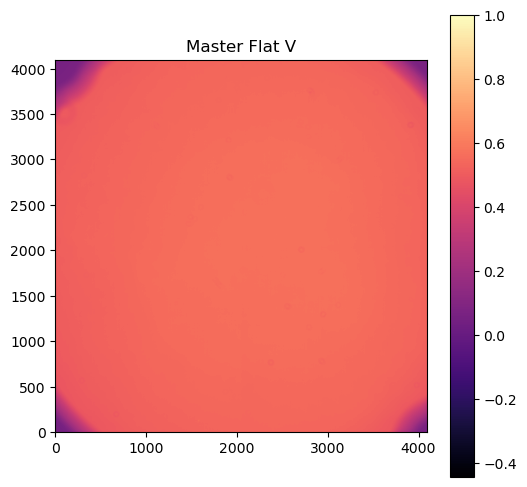

In [24]:
plt.figure(figsize=(6, 6))
plt.imshow(master_flatV, cmap='magma', origin='lower')
plt.colorbar()
plt.title('Master Flat V')
plt.show()

**Reducción Raws NGC 2070 - filtro B y V** 

**NGC 2070 FILTRO B**

In [25]:
RawsB = [r'C:\Yop\imagenes_astro\raw\NGC2070B_400s_1.fit', r'C:\Yop\imagenes_astro\raw\NGC2070B_400s_2.fit', r'C:\Yop\imagenes_astro\raw\NGC2070B_400s_3.fit']

header = fits.getheader(RawsB[0]) # Obtenemos los metadatos de unos de los archivos fits, para luego mantenerlos en el nuevo
                                                       #archivo fits
#aqui guardamos los datos de los Raws
lista_RawsfinalB = []

for RawB in RawsB:                      # llamamos a cada Raw, para conseguir su info o array, y luego dejamos la informacion..
    Raw_B = fits.getdata(RawB)                                         # en la lista_Raws
    raw_arrayB = np.array(Raw_B) 
    raw_final = (raw_arrayB - master_dark400s)/master_flatB
    lista_RawsfinalB.append(raw_final)

raw_arrayB = np.array(lista_RawsfinalB)
raw_finalB = np.median(raw_arrayB, 0)

fits.writeto(r'C:\Yop\imagenes_astro\raw\NGC2070B.fit', raw_finalB, header = header, overwrite = True)

In [26]:
lista_sinprocesarB = []
for Raw in RawsB:                      #llamamos a cada Raw, para conseguir su info o array, y luego dejamos la informacion..
    Raw_ = fits.getdata(Raw)
    raw_array = np.array(Raw_)    # en la lista_Raws
    lista_sinprocesarB.append(raw_array)

array_sin = np.array(lista_sinprocesarB)
stack = np.stack(lista_sinprocesarB, 0)
raw_sinprocesar = np.median(stack, 0)


fits.writeto(r'C:\Yop\imagenes_astro\raw\NGC2070B_sin_reducir.fit', raw_sinprocesar, overwrite = True)

**Hasta ahora tenemos la imagen Raw procesada y sin procesar, consecuentemente veo el resultado comparandolas**

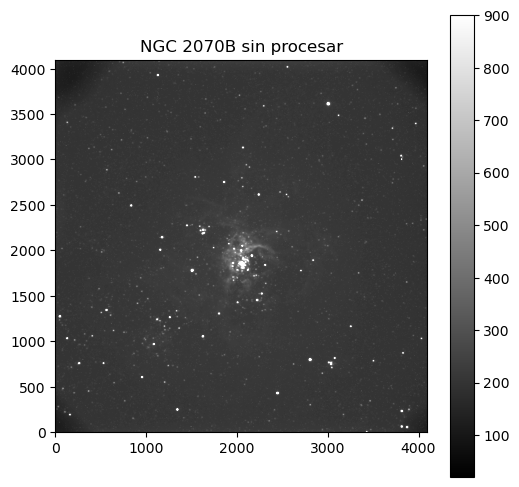

In [27]:
plt.figure(figsize=(6, 6))
plt.imshow(raw_sinprocesar, cmap='gray', origin='lower', vmin=20, vmax=900)
plt.savefig(r'C:\Yop\imagenes_astro\NGC2070B_sinprocesar.png', format='png')
plt.colorbar()
plt.title('NGC 2070B sin procesar')
plt.show()

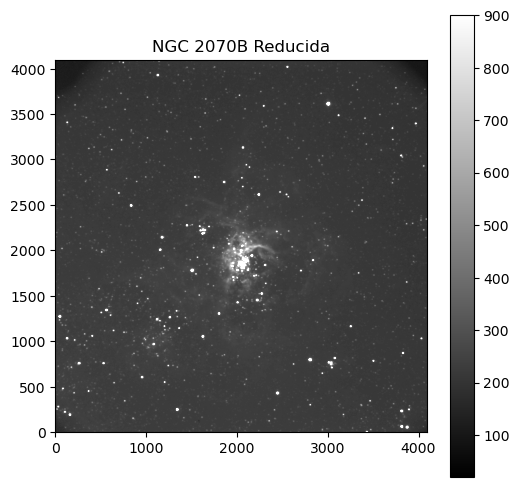

In [28]:
plt.figure(figsize=(6, 6))
plt.imshow(raw_finalB, cmap='gray', origin='lower', vmin=20, vmax=900)
plt.savefig(r'C:\Yop\imagenes_astro\NGC2070B_reducida.png', format='png')
plt.colorbar()
plt.title('NGC 2070B Reducida')
plt.show()

**NGC 2070 FILTRO V**

In [29]:
RawsV = [r'C:\Yop\imagenes_astro\raw\NGC2070V_150s_1.fit', r'C:\Yop\imagenes_astro\raw\NGC2070V_150s_2.fit', r'C:\Yop\imagenes_astro\raw\NGC2070V_150s_3.fit']

header = fits.getheader(RawsV[0])
 #aqui guardamos los datos de los Raws
lista_RawsfinalV = []

for Raw in RawsV:                      #llamamos a cada Raw, para conseguir su info o array, y luego dejamos la informacion..
    Raw_ = fits.getdata(Raw)
    raw_array = np.array(Raw_)    #en la lista_Raws
    raw_final = (raw_array - master_dark150s)/(master_flatV)
    lista_RawsfinalV.append(raw_final)


raw_stack = np.stack(lista_RawsfinalV, axis =0)
raw_finalV = np.median(raw_stack, 0)

fits.writeto(r'C:\Yop\imagenes_astro\raw\NGC2070V.fit', raw_finalV, header = header, overwrite = True)

In [30]:
raw_finalV

array([[-108.24634309, -174.00400802, -327.90030211, ..., -341.51228264,
        -229.7348711 , -353.82233089],
       [-425.9058208 ,  -63.45014615,  -82.66708981, ..., -157.46614723,
        -469.12139808, -139.07314469],
       [ -42.63240589, -204.39736347, -407.89852803, ..., -400.90551392,
        -194.12764228, -372.0187704 ],
       ...,
       [-174.22384067,  -56.85768335, -319.03659942, ..., -249.37835078,
        -379.08959757, -433.80630284],
       [ -57.74844812, -240.8458037 , -205.84224138, ..., -380.63100381,
        -381.89265681, -338.99531494],
       [-320.79310345, -327.60704304, -380.93594618, ..., -475.21188428,
        -479.43869002, -201.09418425]])

In [31]:
lista_sinprocesarV = []
for Raw in RawsV:                      # llamamos a cada Raw, para conseguir su info o array, y luego dejamos la informacion..
    Raw_ = fits.getdata(Raw)
    raw_array = np.array(Raw_)    # en la lista_Raws
    lista_sinprocesarV.append(raw_array)

stack = np.stack(lista_sinprocesarV, 0)
raw_sinprocesarV = np.median(stack, 0)

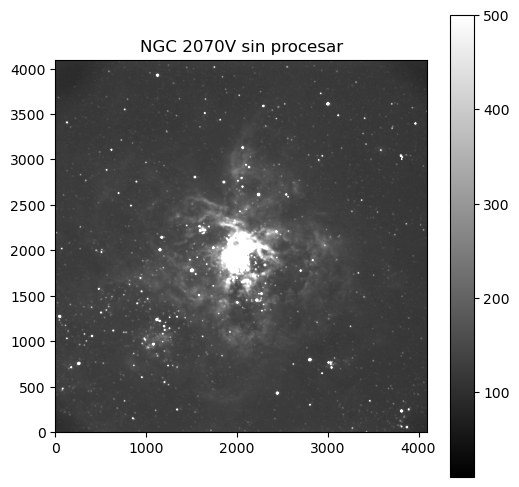

In [32]:
plt.figure(figsize=(6, 6))
plt.imshow(raw_sinprocesarV, cmap='gray', origin='lower', vmin=10, vmax=500)
plt.savefig(r'C:\Yop\imagenes_astro\NGC2070V_sinreducir.png', format='png')
plt.colorbar()
plt.title('NGC 2070V sin procesar')
plt.show()

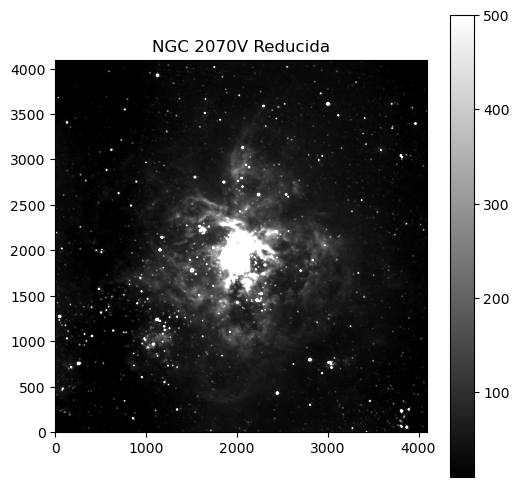

In [33]:
plt.figure(figsize=(6, 6))
plt.imshow(raw_finalV, cmap='gray', origin='lower', vmin=10, vmax=500)
plt.savefig(r'C:\Yop\imagenes_astro\NGC2070V_reducida.png', format='png')
plt.colorbar()
plt.title('NGC 2070V Reducida')
plt.show()

-------------------------------------------------------------------------------

-------------------------------------------------------

**Por entretenimiento obtengo en filtro i, para intentar tener una imagen "rgb", realmente "bvi"**

**Master Dark 100s**

In [34]:
darks = ['C:\Yop\imagenes_astro\Darks\DARK_100s_1.fit', 'C:\Yop\imagenes_astro\Darks\DARK_100s_2.fit', 'C:\Yop\imagenes_astro\Darks\DARK_100s_3.fit', 'C:\Yop\imagenes_astro\Darks\DARK_100s_4.fit', 'C:\Yop\imagenes_astro\Darks\DARK_100s_5.fit']

lista_dark = [] #aqui guardamos los datos de los darks

for dark in darks:               # llamamos a cada dark, para conseguir su info o array, y luego dejamos la informacion..
    Dark_ = fits.getdata(dark)                  # en la lista_dark
    lista_dark.append(Dark_)
    
darks_array = np.array(lista_dark) #cada elemento de la lista a un arreglo 

master_dark100s = np.median(darks_array, 0) #Obtenemos mediana del arreglo de todos los darks
#creamos mascara por si las moskitas 
master_dark100s[master_dark100s == 0] = 0.00001

#guardamos el archivo fits
fits.writeto('C:\Yop\imagenes_astro\Darks\master_dark100s.fit', master_dark100s, overwrite = True)

**Flat filtro i**

In [35]:
Flats = ['C:\Yop\imagenes_astro\Flats\FLAT_i1.fit', 'C:\Yop\imagenes_astro\Flats\FLAT_i2.fit', 'C:\Yop\imagenes_astro\Flats\FLAT_i3.fit', 'C:\Yop\imagenes_astro\Flats\FLAT_i4.fit', 'C:\Yop\imagenes_astro\Flats\FLAT_i5.fit']


lista_flats = [] #aqui guardamos la data de los flats

for flat_ in Flats:                      # llamamos a cada flat, para conseguir su info(pixel value de R[x,y])...
    Flat = fits.getdata(flat_)                      # y luego dejamos la informacion en la lista_flats
    Flat_calibrado = Flat - master_dark100s
    Flats_C_normalizados = Flat_calibrado/Flat_calibrado.max()
    lista_flats.append(Flats_C_normalizados)
    
array_flats = np.array(lista_flats)
mediana_flats_calibrados = np.median(array_flats, 0)
max_ = mediana_flats_calibrados.max()

master_flatI = mediana_flats_calibrados/max_
#mascara por si en la resta dio valores 0 
master_flatI[master_flatI == 0] = 0.0001

fits.writeto('C:\Yop\imagenes_astro\Flats\master_FlatI.fit', master_flatI, overwrite = True)

**NGC filtro I**

In [36]:
RawsI = [r'C:\Yop\imagenes_astro\raw\NGC2070i_100s_1.fit', r'C:\Yop\imagenes_astro\raw\NGC2070i_100s_2.fit', r'C:\Yop\imagenes_astro\raw\NGC2070i_100s_3.fit']

header = fits.getheader(RawsI[0])
 #aqui guardamos los datos de los Raws
lista_RawsfinalI = []

for Raw in RawsI:                      # llamamos a cada Raw, para conseguir su info o array, y luego dejamos la informacion..
    Raw_ = fits.getdata(Raw)
    raw_array = np.array(Raw_)    # en la lista_Raws
    raw_final = (raw_array - master_dark100s)/(master_flatI)
    lista_RawsfinalI.append(raw_final)


raw_stackI = np.stack(lista_RawsfinalI, axis=0)
raw_finalI = np.median(raw_stackI, 0)

fits.writeto(r'C:\Yop\imagenes_astro\raw\NGC2070I.fit', raw_finalI, header = header, overwrite = True)

In [37]:
lista_sinprocesarI = []
for Raw in RawsI:                      # llamamos a cada Raw, para conseguir su info o array, y luego dejamos la informacion..
    Raw_ = fits.getdata(Raw)
    raw_array = np.array(Raw_)    # en la lista_Raws
    lista_sinprocesarI.append(raw_array)

stack = np.stack(lista_sinprocesarI, 0)
raw_sinprocesarI = np.median(stack, 0)

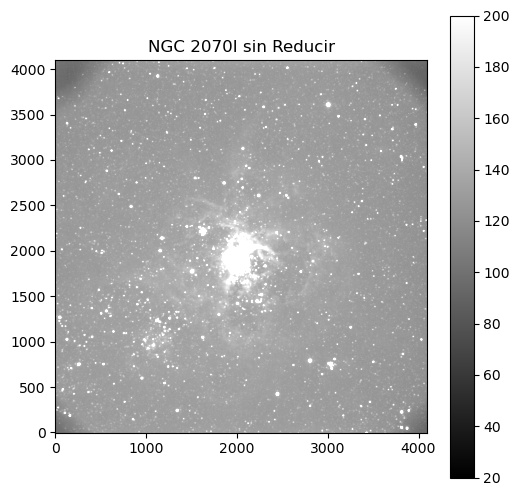

In [38]:
plt.figure(figsize=(6, 6))
plt.imshow(raw_sinprocesarI, cmap='gray', origin='lower', vmin=20, vmax=200)
plt.savefig(r'C:\Yop\imagenes_astro\NGC2070I_sinreducir.png', format='png')
plt.colorbar()
plt.title('NGC 2070I sin Reducir')
plt.show()

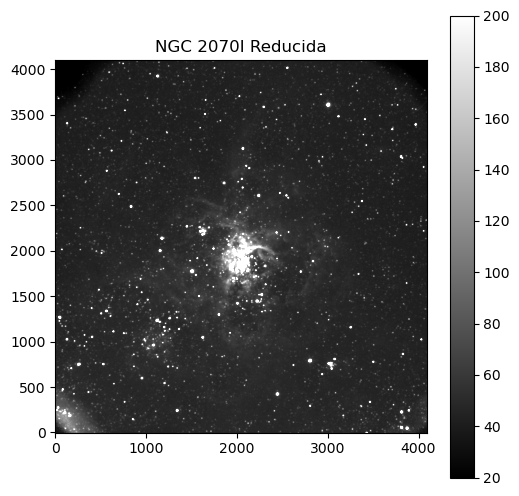

In [39]:
plt.figure(figsize=(6, 6))
plt.imshow(raw_finalI, cmap='gray', origin='lower', vmin=20, vmax=200)
plt.savefig(r'C:\Yop\imagenes_astro\NGC2070I_reducida.png', format='png')
plt.colorbar()
plt.title('NGC 2070I Reducida')
plt.show()

**IMAGEN RGB**

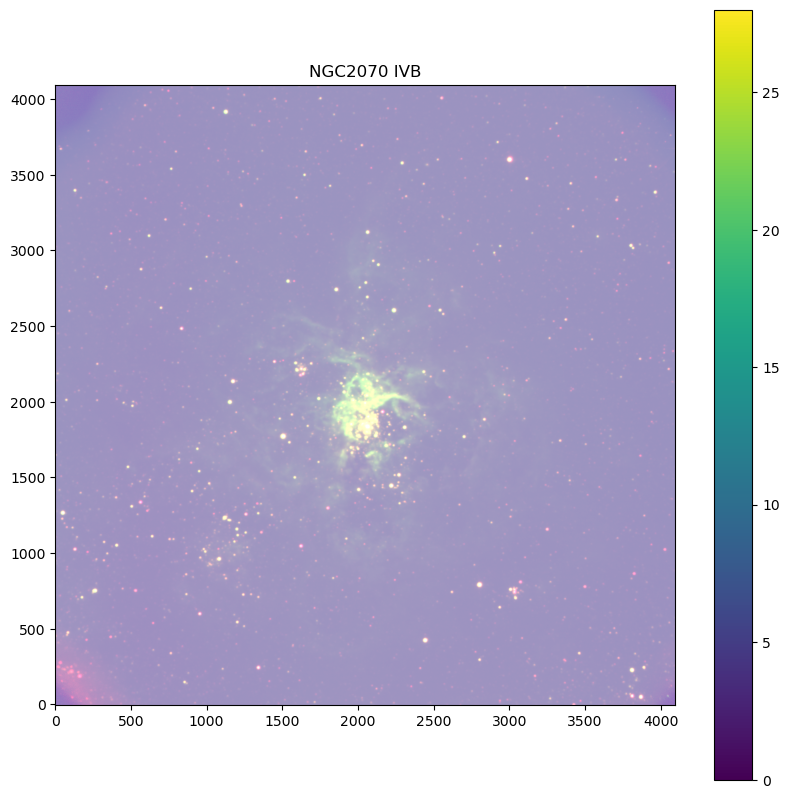

[[[0.57469386 0.53396274 0.75171137]
  [0.60790431 0.51232281 0.7572197 ]
  [0.57408345 0.46167768 0.75548095]
  ...
  [0.52457417 0.45719816 0.74821941]
  [0.50860941 0.49398255 0.75030187]
  [0.63799937 0.4531471  0.75099538]]

 [[0.60690928 0.42942542 0.7571357 ]
  [0.55715297 0.54870454 0.75716442]
  [0.70356858 0.54238051 0.75295674]
  ...
  [0.65080465 0.51776519 0.75490207]
  [0.60357327 0.41520378 0.7550876 ]
  [0.73130789 0.52381807 0.75287833]]

 [[0.54099886 0.55555537 0.75972042]
  [0.5891352  0.50232077 0.75288039]
  [0.49253614 0.43535137 0.75204209]
  ...
  [0.61781966 0.43765268 0.75721173]
  [0.44589393 0.5057004  0.75053557]
  [0.58701471 0.4471589  0.75208125]]

 ...

 [[0.57463936 0.51225046 0.7552576 ]
  [0.58343219 0.55087403 0.75480543]
  [0.55393565 0.4645946  0.7502573 ]
  ...
  [0.57181818 0.48751816 0.75097774]
  [0.57186524 0.44483199 0.75202103]
  [0.62080997 0.42682549 0.75234056]]

 [[0.55441239 0.55058089 0.749431  ]
  [0.58325865 0.4903261  0.7544011 ]


In [47]:
NGC_I = fits.getdata(r'C:\Yop\imagenes_astro\raw\NGC2070I.fit')
NGC_V = fits.getdata(r'C:\Yop\imagenes_astro\raw\NGC2070V.fit')
NGC_B = fits.getdata(r'C:\Yop\imagenes_astro\raw\NGC2070B.fit')

NGC_I = (NGC_I - np.min(NGC_I)) / (np.max(NGC_I) - np.min(NGC_I))
NGC_V= (NGC_V - np.min(NGC_V)) / (np.max(NGC_V) - np.min(NGC_V))
NGC_B = (NGC_B - np.min(NGC_B)) / (np.max(NGC_B) - np.min(NGC_B))

ngc2070_iVB = np.dstack((70*NGC_I, 22*NGC_V, 4*NGC_B)) #np.zeros para dar en negro los canales rojos y verdes respectivamente
Image = np.clip(ngc2070_iVB, 0, 1)

plt.figure(figsize=(10, 10))
plt.imshow(Image, vmin=0, vmax=28, origin='lower' )
plt.colorbar()
plt.title('NGC2070 IVB')
plt.show()

print(ngc2070_iVB)